## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

In [3]:
!pip3 install -U scikit-learn
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install statsmodels

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\autot\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 랜덤 시드값 설정 및 데이터 임의 생성

In [14]:
np.random.seed(0)

# 평균이 30, 표춘편차가 3, 데이터 100개
Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)

In [15]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano
})

## matplot library를 활용한 point plot

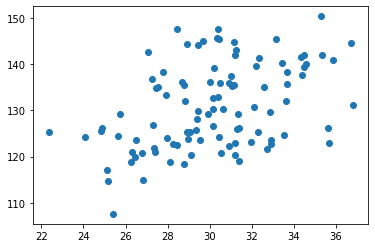

In [7]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.show()

## Input 데이터 가공

In [8]:
import statsmodels.api as sm

InputFeature = Data['Temp']
InputFeature = sm.add_constant(InputFeature)

print(InputFeature.head())

   const       Temp
0    1.0  35.292157
1    1.0  31.200472
2    1.0  32.936214
3    1.0  36.722680
4    1.0  35.602674


C:\Users\autot\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Linear regression 모델 fitting

In [16]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [9]:
model = sm.OLS(
    Data['Sales'],
    InputFeature
)

model = model.fit()
print(model.params)

const    91.425350
Temp      1.305862
dtype: float64


In [10]:
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     22.58
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           6.90e-06
Time:                        14:40:34   Log-Likelihood:                -352.62
No. Observations:                 100   AIC:                             709.2
Df Residuals:                      98   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.4253      8.335     10.969      0.0

<h2>모델의 해석</h2>
Coef: 모델의 기울기. Coefficient of Temp: 1.3059<br>
기온이 1도 오를 때, 아이스아메리카노는 1.3059잔 더 팔린다.<br>
<br>
Pvalue (P>|t|): < 0.05 보다 작음<br>
-> 유의하게 Coefficient가 0이 아니다.<br>
즉 기온이 아메리카노에 영향을 준다.<br>


## 예측 수행 및 결과

In [11]:
print(model.predict(InputFeature))

0     137.512054
1     132.168876
2     134.435516
3     139.380120
4     137.917546
         ...    
95    133.369287
96    130.642359
97    137.597529
98    131.098414
99    132.176053
Length: 100, dtype: float64


## 기온이 35.2'C 일 때의 아이스 아메리카노 판매량

In [12]:
model.predict([1, 35.2])

array([137.39170963])

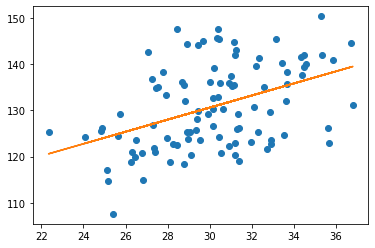

In [13]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['Temp'], model.predict(InputFeature))
plt.show()